In [7]:
from base import *
import csv

In [8]:
attribute_names = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "num"
]
processed_data = []
file_path='/data/chenxi/llm-feature-engeneering/dataset/processed.cleveland.csv'
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    for record in csv_reader:
        record_dict = {}
        for i in range(len(attribute_names)):
            if record[i] == "?":
                record_dict[attribute_names[i]] = None
            else:
                record_dict[attribute_names[i]] = float(record[i])
        processed_data.append(record_dict)
df = pd.DataFrame(processed_data).dropna()
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

In [9]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from transformers import BertModel, BertTokenizer

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000000),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import re
def get_matching_cols(df, regex):
    r = re.compile(regex)
    return( list( filter( r.match, df.columns) ) )

def get_embedding_cols(df):
    return get_matching_cols(df, "(vec_\d+)")

## ours


INFO:base:Downloading pre-trained model 'fine_tuned_model_heart_disease1'


Processing seed 0...


INFO:base:Downloading tokenizer for 'fine_tuned_model_heart_disease1'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 189/189 [00:01<00:00, 111.01 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 60/60 [00:00<00:00, 195.79 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.85
Method: baseline | Model: Logistic Regression | roc_auc: 0.9011111111111112
Method: baseline | Model: Random Forest | accuracy: 0.7666666666666667
Method: baseline | Model: Random Forest | roc_auc: 0.8822222222222222
Method: baseline | Model: AdaBoost | accuracy: 0.75
Method: baseline | Model: AdaBoost | roc_auc: 0.828888888888889
Method: baseline | Model: Gradient Boosting | accuracy: 0.8666666666666667
Method: baseline | Model: Gradient Boosting | roc_auc: 0.8877777777777778
Method: baseline | Model: Support Vector Machine | accuracy: 0.8333333333333334
Method: baseline | Model: Support Vector Machine | roc_auc: 0.9022222222222221
Method: baseline | Model: XGBoost | accuracy: 0.7833333333333333
Method: baseline | Model: XGBoost | roc_auc: 0.8766666666666666


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8833333333333333
Method: SelectK | Model: Logistic Regression | roc_auc: 0.9488888888888889
Method: SelectK | Model: Random Forest | accuracy: 0.7833333333333333
Method: SelectK | Model: Random Forest | roc_auc: 0.8872222222222221
Method: SelectK | Model: AdaBoost | accuracy: 0.7666666666666667
Method: SelectK | Model: AdaBoost | roc_auc: 0.851111111111111
Method: SelectK | Model: Gradient Boosting | accuracy: 0.7666666666666667
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.865
Method: SelectK | Model: Support Vector Machine | accuracy: 0.6
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.6744444444444445
Method: SelectK | Model: XGBoost | accuracy: 0.8166666666666667
Method: SelectK | Model: XGBoost | roc_auc: 0.9177777777777778


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Method: PCA | Model: Logistic Regression | accuracy: 0.75
Method: PCA | Model: Logistic Regression | roc_auc: 0.8644444444444445
Method: PCA | Model: Random Forest | accuracy: 0.7833333333333333
Method: PCA | Model: Random Forest | roc_auc: 0.8544444444444443
Method: PCA | Model: AdaBoost | accuracy: 0.75
Method: PCA | Model: AdaBoost | roc_auc: 0.798888888888889
Method: PCA | Model: Gradient Boosting | accuracy: 0.8
Method: PCA | Model: Gradient Boosting | roc_auc: 0.8477777777777779
Method: PCA | Model: Support Vector Machine | accuracy: 0.7833333333333333
Method: PCA | Model: Support Vector Machine | roc_auc: 0.8555555555555556


INFO:base:Downloading pre-trained model 'fine_tuned_model_heart_disease2'


Method: PCA | Model: XGBoost | accuracy: 0.8
Method: PCA | Model: XGBoost | roc_auc: 0.8566666666666666
Processing seed 1...


INFO:base:Downloading tokenizer for 'fine_tuned_model_heart_disease2'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 189/189 [00:01<00:00, 188.82 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 60/60 [00:00<00:00, 221.88 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.8166666666666667
Method: baseline | Model: Logistic Regression | roc_auc: 0.8966666666666666
Method: baseline | Model: Random Forest | accuracy: 0.8666666666666667
Method: baseline | Model: Random Forest | roc_auc: 0.9144444444444445
Method: baseline | Model: AdaBoost | accuracy: 0.85
Method: baseline | Model: AdaBoost | roc_auc: 0.8544444444444445
Method: baseline | Model: Gradient Boosting | accuracy: 0.8333333333333334
Method: baseline | Model: Gradient Boosting | roc_auc: 0.9055555555555556
Method: baseline | Model: Support Vector Machine | accuracy: 0.85
Method: baseline | Model: Support Vector Machine | roc_auc: 0.9155555555555556
Method: baseline | Model: XGBoost | accuracy: 0.8
Method: baseline | Model: XGBoost | roc_auc: 0.88


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.9
Method: SelectK | Model: Logistic Regression | roc_auc: 0.948888888888889
Method: SelectK | Model: Random Forest | accuracy: 0.8666666666666667
Method: SelectK | Model: Random Forest | roc_auc: 0.925
Method: SelectK | Model: AdaBoost | accuracy: 0.8666666666666667
Method: SelectK | Model: AdaBoost | roc_auc: 0.8911111111111112
Method: SelectK | Model: Gradient Boosting | accuracy: 0.8833333333333333
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.9388888888888889
Method: SelectK | Model: Support Vector Machine | accuracy: 0.6333333333333333
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.7244444444444444
Method: SelectK | Model: XGBoost | accuracy: 0.9
Method: SelectK | Model: XGBoost | roc_auc: 0.9222222222222222


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Method: PCA | Model: Logistic Regression | accuracy: 0.8666666666666667
Method: PCA | Model: Logistic Regression | roc_auc: 0.8788888888888889
Method: PCA | Model: Random Forest | accuracy: 0.7833333333333333
Method: PCA | Model: Random Forest | roc_auc: 0.8511111111111112
Method: PCA | Model: AdaBoost | accuracy: 0.7666666666666667
Method: PCA | Model: AdaBoost | roc_auc: 0.8516666666666667
Method: PCA | Model: Gradient Boosting | accuracy: 0.7833333333333333
Method: PCA | Model: Gradient Boosting | roc_auc: 0.8544444444444445
Method: PCA | Model: Support Vector Machine | accuracy: 0.8666666666666667
Method: PCA | Model: Support Vector Machine | roc_auc: 0.9177777777777777


INFO:base:Downloading pre-trained model 'fine_tuned_model_heart_disease3'


Method: PCA | Model: XGBoost | accuracy: 0.7833333333333333
Method: PCA | Model: XGBoost | roc_auc: 0.8583333333333334
Processing seed 2...


INFO:base:Downloading tokenizer for 'fine_tuned_model_heart_disease3'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 189/189 [00:00<00:00, 239.28 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 60/60 [00:00<00:00, 217.63 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.8166666666666667
Method: baseline | Model: Logistic Regression | roc_auc: 0.8787878787878788
Method: baseline | Model: Random Forest | accuracy: 0.8166666666666667
Method: baseline | Model: Random Forest | roc_auc: 0.8748597081930415
Method: baseline | Model: AdaBoost | accuracy: 0.8
Method: baseline | Model: AdaBoost | roc_auc: 0.8249158249158249
Method: baseline | Model: Gradient Boosting | accuracy: 0.7666666666666667
Method: baseline | Model: Gradient Boosting | roc_auc: 0.856341189674523
Method: baseline | Model: Support Vector Machine | accuracy: 0.7833333333333333
Method: baseline | Model: Support Vector Machine | roc_auc: 0.8945005611672279
Method: baseline | Model: XGBoost | accuracy: 0.8166666666666667
Method: baseline | Model: XGBoost | roc_auc: 0.8686868686868686


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.8666666666666667
Method: SelectK | Model: Logistic Regression | roc_auc: 0.9304152637485971
Method: SelectK | Model: Random Forest | accuracy: 0.8166666666666667
Method: SelectK | Model: Random Forest | roc_auc: 0.9349046015712682
Method: SelectK | Model: AdaBoost | accuracy: 0.85
Method: SelectK | Model: AdaBoost | roc_auc: 0.9225589225589225
Method: SelectK | Model: Gradient Boosting | accuracy: 0.8166666666666667
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.9068462401795735
Method: SelectK | Model: Support Vector Machine | accuracy: 0.7166666666666667
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.749719416386083
Method: SelectK | Model: XGBoost | accuracy: 0.85
Method: SelectK | Model: XGBoost | roc_auc: 0.9349046015712683


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Method: PCA | Model: Logistic Regression | accuracy: 0.7833333333333333
Method: PCA | Model: Logistic Regression | roc_auc: 0.8877665544332211
Method: PCA | Model: Random Forest | accuracy: 0.7166666666666667
Method: PCA | Model: Random Forest | roc_auc: 0.7648709315375981
Method: PCA | Model: AdaBoost | accuracy: 0.7166666666666667
Method: PCA | Model: AdaBoost | roc_auc: 0.8411896745230079
Method: PCA | Model: Gradient Boosting | accuracy: 0.7166666666666667
Method: PCA | Model: Gradient Boosting | roc_auc: 0.8148148148148149
Method: PCA | Model: Support Vector Machine | accuracy: 0.7666666666666667
Method: PCA | Model: Support Vector Machine | roc_auc: 0.8181818181818182


INFO:base:Downloading pre-trained model 'fine_tuned_model_heart_disease4'


Method: PCA | Model: XGBoost | accuracy: 0.75
Method: PCA | Model: XGBoost | roc_auc: 0.7873176206509541
Processing seed 3...


INFO:base:Downloading tokenizer for 'fine_tuned_model_heart_disease4'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 189/189 [00:00<00:00, 232.94 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 60/60 [00:00<00:00, 214.69 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.8333333333333334
Method: baseline | Model: Logistic Regression | roc_auc: 0.92880978865406
Method: baseline | Model: Random Forest | accuracy: 0.8166666666666667
Method: baseline | Model: Random Forest | roc_auc: 0.9399332591768632
Method: baseline | Model: AdaBoost | accuracy: 0.7833333333333333
Method: baseline | Model: AdaBoost | roc_auc: 0.8709677419354839
Method: baseline | Model: Gradient Boosting | accuracy: 0.8166666666666667
Method: baseline | Model: Gradient Boosting | roc_auc: 0.9243604004449387
Method: baseline | Model: Support Vector Machine | accuracy: 0.8333333333333334
Method: baseline | Model: Support Vector Machine | roc_auc: 0.9488320355951056
Method: baseline | Model: XGBoost | accuracy: 0.7833333333333333
Method: baseline | Model: XGBoost | roc_auc: 0.9187986651835374


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.95
Method: SelectK | Model: Logistic Regression | roc_auc: 0.9866518353726363
Method: SelectK | Model: Random Forest | accuracy: 0.9166666666666666
Method: SelectK | Model: Random Forest | roc_auc: 0.9488320355951056
Method: SelectK | Model: AdaBoost | accuracy: 0.9
Method: SelectK | Model: AdaBoost | roc_auc: 0.9744160177975528
Method: SelectK | Model: Gradient Boosting | accuracy: 0.8833333333333333
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.949944382647386
Method: SelectK | Model: Support Vector Machine | accuracy: 0.6666666666666666
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.7864293659621802
Method: SelectK | Model: XGBoost | accuracy: 0.8833333333333333
Method: SelectK | Model: XGBoost | roc_auc: 0.9521690767519466


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Method: PCA | Model: Logistic Regression | accuracy: 0.9
Method: PCA | Model: Logistic Regression | roc_auc: 0.9410456062291436
Method: PCA | Model: Random Forest | accuracy: 0.8666666666666667
Method: PCA | Model: Random Forest | roc_auc: 0.9149054505005562
Method: PCA | Model: AdaBoost | accuracy: 0.7666666666666667
Method: PCA | Model: AdaBoost | roc_auc: 0.8487208008898777
Method: PCA | Model: Gradient Boosting | accuracy: 0.8666666666666667
Method: PCA | Model: Gradient Boosting | roc_auc: 0.9232480533926586
Method: PCA | Model: Support Vector Machine | accuracy: 0.9
Method: PCA | Model: Support Vector Machine | roc_auc: 0.9310344827586208


INFO:base:Downloading pre-trained model 'fine_tuned_model_heart_disease5'


Method: PCA | Model: XGBoost | accuracy: 0.8333333333333334
Method: PCA | Model: XGBoost | roc_auc: 0.8876529477196885
Processing seed 4...


INFO:base:Downloading tokenizer for 'fine_tuned_model_heart_disease5'
INFO:base:Generating embedding vectors
Map: 100%|██████████| 189/189 [00:00<00:00, 239.42 examples/s]
INFO:base:Generating embedding vectors
Map: 100%|██████████| 60/60 [00:00<00:00, 221.39 examples/s]


Method: baseline | Model: Logistic Regression | accuracy: 0.8666666666666667
Method: baseline | Model: Logistic Regression | roc_auc: 0.914349276974416
Method: baseline | Model: Random Forest | accuracy: 0.8666666666666667
Method: baseline | Model: Random Forest | roc_auc: 0.9204671857619577
Method: baseline | Model: AdaBoost | accuracy: 0.8
Method: baseline | Model: AdaBoost | roc_auc: 0.8954393770856508
Method: baseline | Model: Gradient Boosting | accuracy: 0.8166666666666667
Method: baseline | Model: Gradient Boosting | roc_auc: 0.8731924360400445
Method: baseline | Model: Support Vector Machine | accuracy: 0.8833333333333333
Method: baseline | Model: Support Vector Machine | roc_auc: 0.9243604004449388
Method: baseline | Model: XGBoost | accuracy: 0.8333333333333334
Method: baseline | Model: XGBoost | roc_auc: 0.8676307007786429


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Method: SelectK | Model: Logistic Regression | accuracy: 0.9166666666666666
Method: SelectK | Model: Logistic Regression | roc_auc: 0.967741935483871
Method: SelectK | Model: Random Forest | accuracy: 0.8
Method: SelectK | Model: Random Forest | roc_auc: 0.9410456062291435
Method: SelectK | Model: AdaBoost | accuracy: 0.8833333333333333
Method: SelectK | Model: AdaBoost | roc_auc: 0.9488320355951058
Method: SelectK | Model: Gradient Boosting | accuracy: 0.8166666666666667
Method: SelectK | Model: Gradient Boosting | roc_auc: 0.9232480533926585
Method: SelectK | Model: Support Vector Machine | accuracy: 0.6
Method: SelectK | Model: Support Vector Machine | roc_auc: 0.8153503893214683
Method: SelectK | Model: XGBoost | accuracy: 0.8666666666666667
Method: SelectK | Model: XGBoost | roc_auc: 0.9577308120133481


/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/chenxi/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Method: PCA | Model: Logistic Regression | accuracy: 0.8166666666666667
Method: PCA | Model: Logistic Regression | roc_auc: 0.8954393770856507
Method: PCA | Model: Random Forest | accuracy: 0.8
Method: PCA | Model: Random Forest | roc_auc: 0.8976640711902114
Method: PCA | Model: AdaBoost | accuracy: 0.7833333333333333
Method: PCA | Model: AdaBoost | roc_auc: 0.810901001112347
Method: PCA | Model: Gradient Boosting | accuracy: 0.7666666666666667
Method: PCA | Model: Gradient Boosting | roc_auc: 0.8375973303670745
Method: PCA | Model: Support Vector Machine | accuracy: 0.8166666666666667
Method: PCA | Model: Support Vector Machine | roc_auc: 0.8809788654060066
Method: PCA | Model: XGBoost | accuracy: 0.7833333333333333
Method: PCA | Model: XGBoost | roc_auc: 0.832035595105673


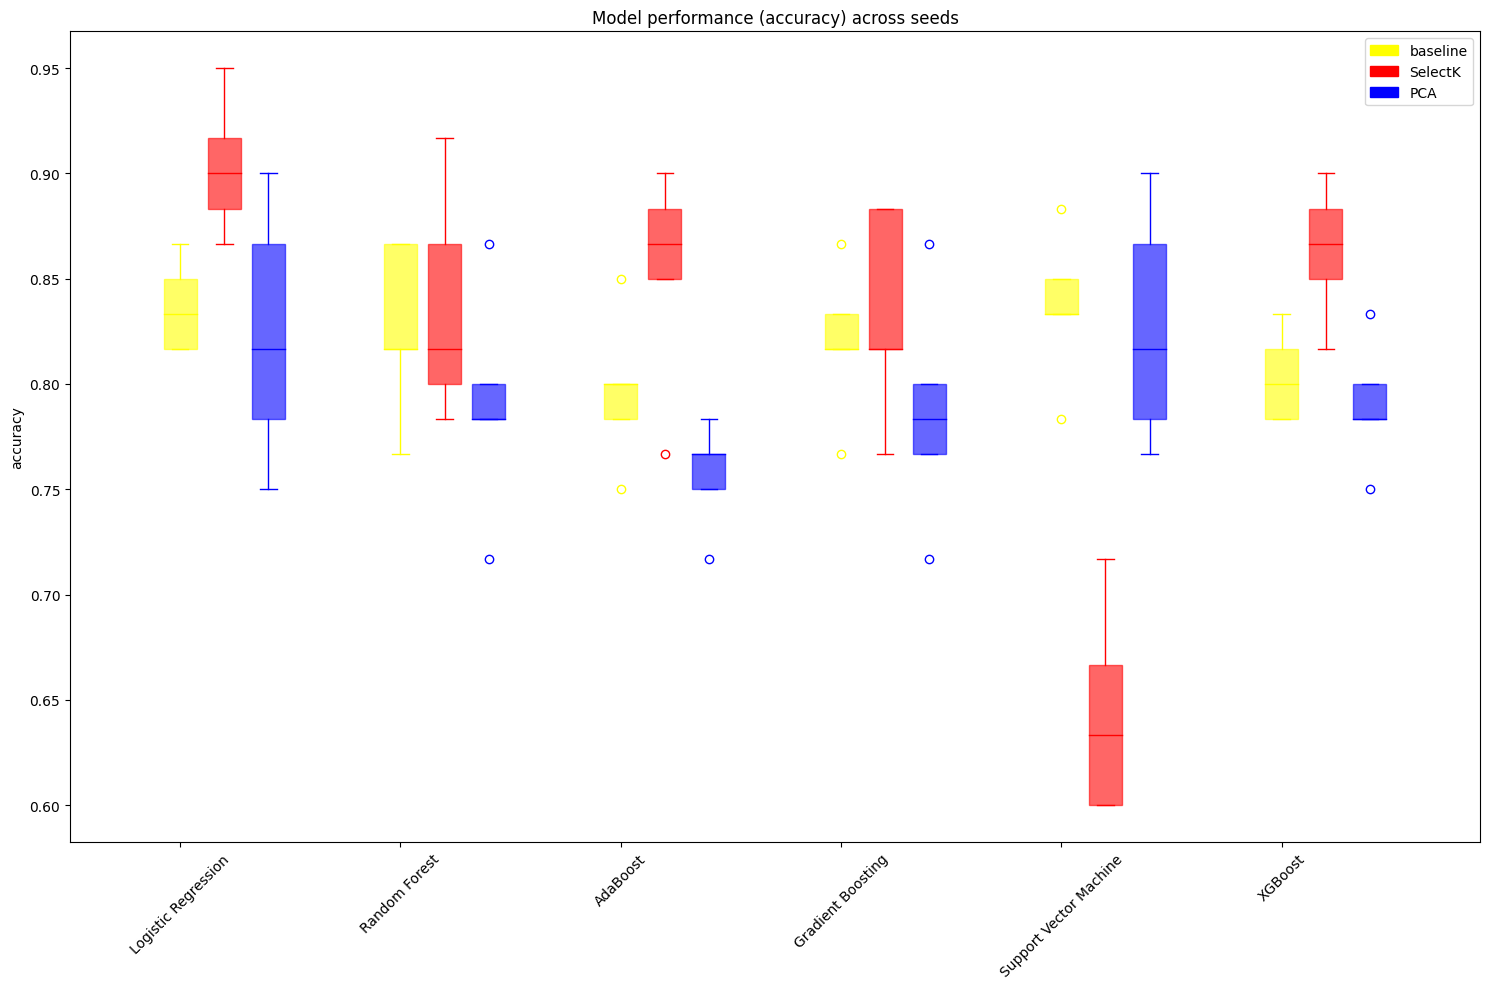

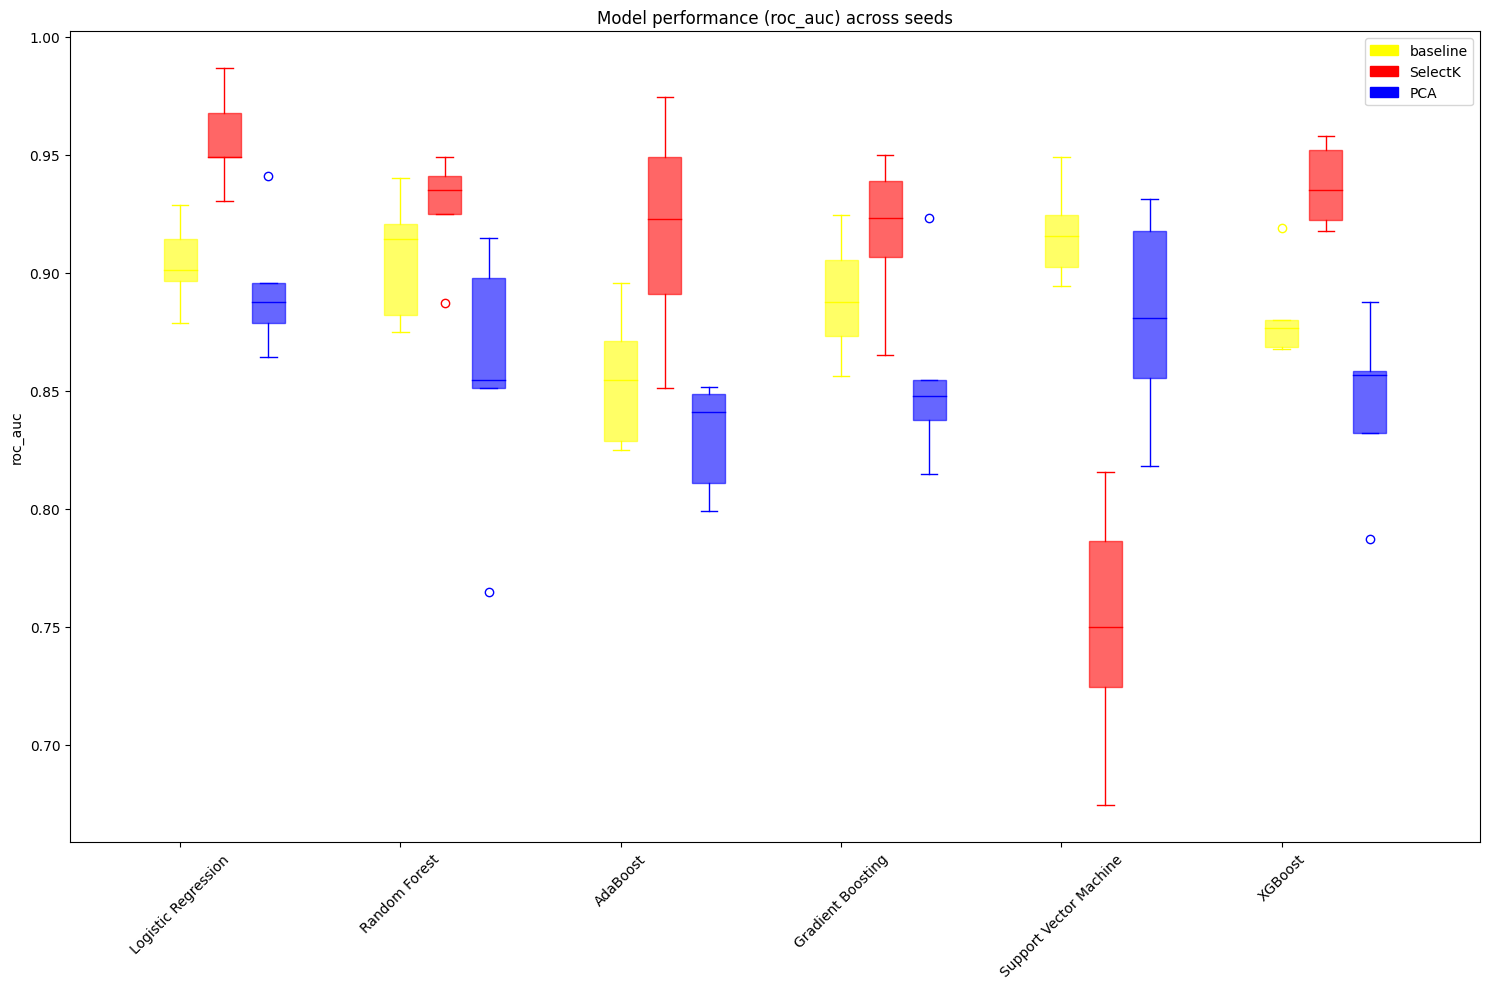

In [12]:
import openai
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import re
from sklearn.metrics import accuracy_score, roc_auc_score
# Define the openai API key (Make sure to keep it confidential!)
import datetime
import json


# Utility functions
def get_matching_cols(df, regex):
    r = re.compile(regex)
    return list(filter(r.match, df.columns))

def get_embedding_cols(df):
    return get_matching_cols(df, "(vec_\d+)")

def explode(col, prefix):
    n_cols = len(col[0])
    col_names = [prefix + str(i) for i in range(n_cols)]
    return pd.DataFrame(col.to_list(), columns=col_names)

def method_baseline(df, scaler=None):
    X = df.drop('num', axis=1)
    y = df['num']
    X_cat = X[[
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal"
]]
    
    if scaler is None:
        scaler = StandardScaler()
        X_final = scaler.fit_transform(X_cat)
    else:
        X_final = scaler.transform(X_cat)
    
    return X_final, y, scaler

def method_SelectK(df, scaler=None, selector=None):
    def explode(col, prefix):
        n_cols = len(col[0])
        col_names = [prefix + str(i) for i in range(n_cols)]
        return pd.DataFrame(col.to_list(), columns=col_names)

    # Explode text_vector
    exploded = explode(df['text_vector'], 'vec_')
    df.loc[:, exploded.columns] = exploded

    X = df.drop('num', axis=1)
    y = df['num']

    # Extract features
    X_cat = X[[
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal"
]]
    embed_cols = get_embedding_cols(X)
    X_text = X[embed_cols]
    X_comb = pd.concat([X_cat, X_text], axis=1)

    # Scale the data
    if scaler is None:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_comb)
    else:
        X_scaled = scaler.transform(X_comb)

    # Feature selection
    if selector is None:
        selector = SelectKBest(mutual_info_classif, k=20)
        X_selected = selector.fit_transform(X_scaled, y)
    else:
        X_selected = selector.transform(X_scaled)

    X_final = pd.concat([X_cat, pd.DataFrame(X_selected)], axis=1)
    X_final.columns = X_final.columns.astype(str)

    return X_final, y, scaler, selector

def fit_PCA(train_df):
    # Exploding the embeddings into separate columns
    exploded = explode(train_df['text_vector'], 'vec_')
    train_df.loc[:, exploded.columns] = exploded
    
    # Splitting X and y
    X = train_df.drop('num', axis=1)
    y = train_df['num']

    # Separate original categorical features
    X_cat = X[[
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal"
]]
    # Extract the text embeddings
    embed_cols = get_embedding_cols(X)
    X_text = X[embed_cols]

    # Combine the embeddings and the original set
    X_comb = pd.concat([X_cat, X_text], axis=1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_comb)
    
# Applying PCA on the combined data
    best_n_components = None
    best_score = float('-inf')
    for n_components in range(1, 50):  # Checking all possible number of components
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_scaled)

        # Train a model (e.g., logistic regression) on the PCA components and compute the performance
        model2 = LogisticRegression()
        score = cross_val_score(model2, X_pca, y, cv=5, scoring='roc_auc').mean()

        if score > best_score:
            best_score = score
            best_n_components = n_components
    
    pca = PCA(n_components=best_n_components)
    pca.fit(X_scaled)
    return pca, best_n_components, scaler

def transform_with_PCA(pca,scaler, df):
 # Exploding the embeddings into separate columns
    exploded = explode(df['text_vector'], 'vec_')
    df.loc[:, exploded.columns] = exploded
    
    # Splitting X and y
    X = df.drop('num', axis=1)
    y = df['num']

    # Separate original categorical features
    X_cat = X[[
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal"
]]
    
    # Extract the text embeddings
    embed_cols = get_embedding_cols(X)
    X_text = X[embed_cols]

    # Combine the embeddings and the original set
    X_comb = pd.concat([X_cat, X_text], axis=1)
    X_scaled = scaler.transform(X_comb)  # Only transform using the previously fitted scaler
    
    X_pca = pca.transform(X_scaled)
    X_final = pd.DataFrame(X_pca)
    X_final.columns = [f'PC{i+1}' for i in range(X_final.shape[1])]
    
    return X_final, df['num']



def evaluate_models(train_df, test_df, models, methods):
    method_results = {}
    
    for method in methods:
        method_results[method] = {}

        if method == 'baseline':
            X_train, y_train, scaler = method_baseline(train_df)
            X_test, y_test, _ = method_baseline(test_df, scaler)
        elif method == 'PCA':
            pca, best_n_components, scaler = fit_PCA(train_df)
            X_train, y_train = transform_with_PCA(pca, scaler, train_df)
            X_test, y_test = transform_with_PCA(pca, scaler, test_df)
        elif method == 'SelectK':
            X_train, y_train, train_scaler, train_selector = method_SelectK(train_data)
            X_test, y_test, _, _ = method_SelectK(test_data, train_scaler, train_selector)

        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            for metric in metrics_list:
                if metric == 'accuracy':
                    score = accuracy_score(y_test, y_pred)
                elif metric == 'roc_auc':
                    y_prob = model.predict_proba(X_test)[:, 1]  # assuming binary classification
                    score = roc_auc_score(y_test, y_prob)

                if metric not in method_results[method]:
                    method_results[method][metric] = {}
                if model_name not in method_results[method][metric]:
                    method_results[method][metric][model_name] = []

                method_results[method][metric][model_name].append(score)

                print(f'Method: {method} | Model: {model_name} | {metric}: {score}')

    return method_results

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True), 
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}
methods = ['baseline', 'SelectK', 'PCA']
colors = ['yellow', 'red', 'blue', 'red', 'cyan', 'magenta', 'yellow']  # Added more colors for potential expansion
metrics_list = ['accuracy', 'roc_auc']
# evaluate_models(train_data, test_data, models, methods)
seeds = [0, 1, 2, 3, 4]

# Store results for each seed
all_results = {}

for seed in seeds:
    print(f"Processing seed {seed}...")
    
    # Adjust the paths to load the data based on the current seed
    train_data = pd.read_csv(f'/data/chenxi/llm-feature-engeneering/src/Fine_tune/heart_disease/data_seed_{seed}/train.csv')
    test_data = pd.read_csv(f'/data/chenxi/llm-feature-engeneering/src/Fine_tune/heart_disease/data_seed_{seed}/test.csv')
    
    # Adjust the model name based on the current seed (model number is seed + 1)
    generator = EmbeddingGeneratorForNLPSequenceClassification.from_use_case(
        use_case="NLP.SequenceClassification",
        model_name=f"fine_tuned_model_heart_disease{seed + 1}",
        tokenizer_max_length=512
    )
    
    train_data['text_vector'] = generator.generate_embeddings(text_col=train_data['response'])
    test_data['text_vector'] = generator.generate_embeddings(text_col=test_data['response'])
    
    # Evaluate the models and store the results
    seed_results = evaluate_models(train_data, test_data, models, methods)
    all_results[seed] = seed_results
output_json = {}

for method in methods:
    output_json[method] = {}
    for model_name in models.keys():
        scores = [all_results[seed][method]['roc_auc'][model_name][0] for seed in seeds]
        
        # Calculate median, mean, and standard deviation
        median_score = np.median(scores)
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        
        # Create performance strings for both mean and median
        mean_performance_str = f"{mean_score:.4f} ± {std_score:.2f}"
        median_performance_str = f"{median_score:.4f} ± {std_score:.2f}"
        
        output_json[method][model_name] = {
            "mean_performance": mean_performance_str,
            "median_performance": median_performance_str,
            "mean": mean_score,
            "median": median_score,
            "std": std_score
        }

# Save the JSON structure to a file
current_time = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
file_path = f"/data/chenxi/llm-feature-engeneering/src/Fine_tune/heart_disease/runs/{current_time}.json"
with open(file_path, 'w') as file:
    json.dump(output_json, file, indent=4)

# Now, plot the combined results
for metric in metrics_list:
    plt.figure(figsize=(15, 10))
    
    x_ticks_positions = np.arange(len(models))
    for i, method in enumerate(methods):
        scores_for_all_models = []
        for j, model_name in enumerate(models.keys()):
            scores = [all_results[seed][method][metric][model_name][0] for seed in seeds]
            scores_for_all_models.append(scores)
        
        # Plot boxplots for all models for the current method
        bp = plt.boxplot(scores_for_all_models, positions=x_ticks_positions + i * 0.2, widths=0.15,
                         patch_artist=True, boxprops=dict(facecolor=colors[i], alpha=0.6))
        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
            plt.setp(bp[element], color=colors[i])
        plt.setp(bp["boxes"], facecolor=colors[i])
        plt.setp(bp["fliers"], markeredgecolor=colors[i])
    
    plt.xticks(ticks=x_ticks_positions, labels=models.keys(), rotation=45)
    plt.legend(handles=[mpatches.Patch(color=colors[i], label=method) for i, method in enumerate(methods)], loc='upper right')
    plt.title(f"Model performance ({metric}) across seeds")
    plt.ylabel(metric)
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f"/data/chenxi/llm-feature-engeneering/src/Fine_tune/heart_disease/runs/{metric}_{current_time}.png")
    plt.show()
